# 第5章 参数估计

### 代码框5-1 样本均值、样本中位数和样本方差的无偏性模拟

In [12]:
import numpy as np
x,m,v=[],[],[]
n = 10
for i in range(10000):
    d=np.random.normal(loc=50, scale=10, size=n)
    x.append(np.mean(d))
    m.append(np.median(d))
    v.append(np.var(d, ddof=1))
    #print("样本均值的均值:{np.mean(x): .4f}\n样本中位数均值:{np.mean(m): .4f}\n样本方差的均值:{np.mean(v): .4f}")
print(np.mean(x), np.mean(m), np.mean(v))

49.98696795411786 50.00230552828645 100.17676640814408


### 代码框5-2 样本均值和样本中位数的有效性模拟

In [30]:
#样本均值和样本中位数的有效性模拟
import numpy as np
x, m =[], []
n =10
for i in range(10000):
    d = np.random.normal(size=n)
    x.append(np.mean(d))
    m.append(np.median(d))
    jf = np.var(x, ddof=1)
    zf = np.var(m, ddof=1)
print('样本均值的方差:',round(jf,4), '\n''样本中位数的方差:',round(zf,4))

样本均值的方差: 0.1025 
样本中位数的方差: 0.1411


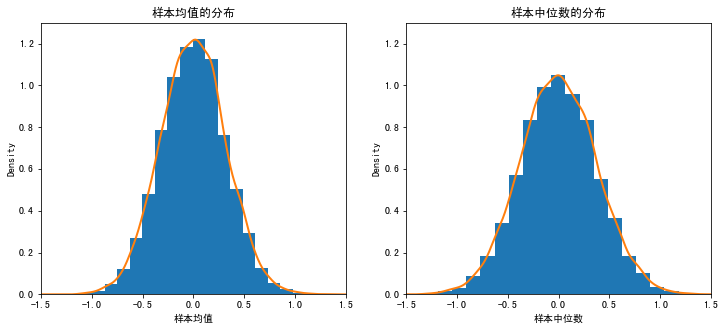

In [38]:
#绘制样本均值和样本中位数分布的直方图
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def plot_dis(df, ax, xlabel):
    df.plot(bins=20, kind='hist', density=True, ax=ax, legend=False)
    df.plot(kind='density',linewidth=2, ax=ax, legend=False)
    ax.set_ylim(0,1.3)
    ax.set_xlim(-1.5,1.5)
    ax.set_xlabel(xlabel)
    ax.set_title(xlabel + '的分布')
    
plt.subplots(1, 2, figsize=(12, 5))
ax1 = plt.subplot(121)
plot_dis(pd.DataFrame(x),ax1,  '样本均值')
ax2 = plt.subplot(122)
plot_dis(pd.DataFrame(m),ax2, '样本中位数')
plt.show()


### 代码框5-3 样本均值的一致性模拟

In [1]:
import pandas as pd;import numpy as np
np.random.seed(2020)
N = np.random.normal(loc=50, scale=10, size=1000)                 #正态分布随机数1000个，
mu = np.mean(N)

xbar10 = np.mean(np.random.choice(N, 10, replace=False))         #随机无放回抽取10个样本
xbar100 = np.mean(np.random.choice(N, 100, replace=False))       #随机无放回抽取100个样本
xbar500 = np.mean(np.random.choice(N, 500, replace=False))       #随机无放回抽取500个样本
xbar900 = np.mean(np.random.choice(N, 900, replace=False))       #随机无放回抽取900个样本
pd.DataFrame([mu, xbar10, xbar100, xbar500, xbar900],['总体均值', 'xbar10', 'xbar100', 'xbar500', 'xbar900']).T

,总体均值,xbar10,xbar100,xbar500,xbar900
0,49.665586,48.45996,50.165167,49.568964,49.636309


In [16]:
#样本均值与总体均值mu的差值d
pd.DataFrame([{'d10':(xbar10-mu), 'd100':(xbar100-mu), 'd500':(xbar500-mu),'d900':(xbar900-mu)}])

,d10,d100,d500,d900
0,-1.205626,0.499581,-0.096622,-0.029277


### 代码框5-4 计算一个总体均值的置信区间（大样本）

In [30]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy.stats import norm
from scipy.stats import sem
example5_1 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap05\example5_1.csv',encoding='gbk')
int = norm.interval(0.90,loc=np.mean(example5_1),scale=sem(example5_1))
np.round(int,4)

array([[7.8359],
       [8.0991]])

### 代码框5-5 计算一个总体均值的置信区间（小样本）

In [33]:
import pandas as pd; import numpy as np; import scipy.stats as st
example5_2 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap05\example5_2.csv',encoding='gbk')
int = st.t.interval(0.95, len(example5_2)-1, loc=np.mean(example5_2),scale=st.sem(example5_2))
np.round(int,4)

array([[101.3748],
       [109.3452]])

### 代码框5-6 计算两个总体均值之差的置信区间（独立大样本）

In [37]:
import pandas as pd;import numpy as np; from scipy.stats import norm
example5_3 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap05\example5_3.csv',encoding='gbk')
x1 = example5_3['男性工资']; x2 = example5_3['女性工资']
conf_level = 0.95
xbar1 = x1.mean(); s1 = x1.std(); n1 = len(x1)
xbar2 = x2.mean(); s2 = x2.std(); n2 = len(x2)
interval = norm.interval(alpha=conf_level, loc=(xbar1-xbar2), scale=np.sqrt(s1**2/n1 + s2**2/n2))
print('男女平均工资之差的95%的置信区间:',np.round(interval, 2))

男女平均工资之差的95%的置信区间: [1826.05 2212.4 ]


### 代码框5-7 计算两个总体均值之差的置信区间（独立小样本）

In [44]:
import pandas as pd
import numpy as np
from scipy.stats import t
from statsmodels.stats.weightstats import ttest_ind

example5_4 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap05\example5_4.csv',encoding='gbk')
x1 = example5_4['方法一']; x2 = example5_4['方法二']
conf_level = 0.95
xbar1 = x1.mean()
xbar2 = x2.mean()
t_value,p_value,df= ttest_ind(x1=x1, x2=x2, alternative='two-sided', usevar='pooled') #使用公式5.9计算方差的合并估计量
interval = t.interval(alpha=conf_level, df=df, loc=(xbar1-xbar2), scale=(xbar1-xbar2/t_value))
print('方法一的平均时间为:',np.round(xbar1,2),'方法二的平均时间:',np.round(xbar2,2), '假定方差相等，两方法组装时间差值95%的置信区间为',np.round(interval,4))


方法一的平均时间为: 32.5 方法二的平均时间: 28.8 假定方差相等，两方法组装时间差值95%的置信区间为 [-35.9929  43.3929]


In [46]:
#平均时间差值95%的置信区间（假设方差不等）
t_value, p_value, df=ttest_ind(x1=x1, x2=x2, alternative='two-sided',usevar='unequal')
interval = t.interval(alpha=conf_level, df=df, loc=(xbar1-xbar2), scale=(xbar1-xbar2)/t_value)
print('方法一的平均时间为:',np.round(xbar1,2),'方法二的平均时间:',np.round(xbar2,2), '假定方差不相等，两方法组装时间差值95%的置信区间为',np.round(interval,4),'自由度为:',np.round(df, 4))

方法一的平均时间为: 32.5 方法二的平均时间: 28.8 假定方差不相等，两方法组装时间差值95%的置信区间为 [0.1384 7.2616] 自由度为: 21.8029


### 代码框5-8 计算两个总体均值之差的置信区间

In [50]:
import pandas as pd
import numpy as np
from scipy.stats import t
example5_5 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap05\example5_5.csv',encoding='gbk')
x1 = example5_5['试卷A']; x2 = example5_5['试卷B']
d = x1-x2
print(d)
conf_level = 0.95
dbar = d.mean(); sd = d.std(); n = len(d)
interval = t.interval(alpha=conf_level, df=n-1, loc=dbar, scale=sd/np.sqrt(n))
print('两套试卷分数之差95%的置信区间为:', np.round(interval, 4))

0     7
1    19
2    11
3     5
4    17
5    -2
6    13
7    16
8     8
9    16
dtype: int64
两套试卷分数之差95%的置信区间为: [ 6.3273 15.6727]


### 代码框5-9 计算一个总体比例的置信区间（大样本）

In [1]:
import numpy as np;from scipy.stats import norm
conf_level = 0.95
n = 500; x = 325
p = x/n
interval = norm.interval(alpha=conf_level, loc=p, scale=np.sqrt(p*(1-p)/n))
print('赞成该项改革的人数比例95%置信区间为:', np.round(interval, 4))

赞成该项改革的人数比例95%置信区间为: [0.6082 0.6918]


### 代码框5-10 计算一个总体比例的置信区间（任意大小样本）

In [2]:
import numpy as np;from scipy.stats import norm
conf_level = 0.95
n1 = 500+4
p1 = (325+2)/n1
interval = norm.interval(alpha=conf_level, loc=p1, scale=np.sqrt(p1*(1-p1)/n1))
print('赞成该项改革人数比例的95%置信区间为:',np.round(interval,4))

赞成该项改革人数比例的95%的置信区间为: [0.6071 0.6905]


### 代码框5-11 计算两个总体比例之差的置信区间（大样本）

In [3]:
#女性与男性收视率差值的95%置信区间(两个大样本)
import numpy as np;from scipy.stats import norm
conf_level = 0.95
n1 = 500
n2 = 400
p1=225/n1; p2=128/n2
interval = norm.interval(alpha=conf_level, loc=(p1-p2), scale=np.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2))
print('女性与男性收视率差值的95%置信区间', np.round(interval, 4))

女性与男性收视率差值的95%置信区间 [0.0668 0.1932]


### 代码框5-12 计算两个总体比例之差的置信区间（任意大小样本）

In [4]:
#女性与男性收视率差值的95%置信区间
import numpy as np; from scipy.stats import norm
conf_level = 0.95
n1 = 500+2
n2 = 400+2
p1 = (225+1)/n1
p2 = (128+1)/n2
interval = norm.interval(alpha=conf_level, loc=(p1-p2),
                         scale=np.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2))
print('女性与男性收视率差值的95%置信区间:', np.round(interval, 4))

女性与男性收视率差值的95%置信区间: [0.0662 0.1924]


### 代码框5-13 计算一个总体方差的置信区间

In [6]:
import pandas as pd; from scipy.stats import chi2
example5_2 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap05\example5_2.csv',encoding='gbk')
x = example5_2['食品重量']
conf_level = 0.95
sigma2 = x.var(); n = len(x)
LCI = (n-1)*sigma2/chi2.ppf(q=(1+conf_level)/2, df=n-1)
UCI = (n-1)*sigma2/chi2.ppf(q=(1-conf_level)/2, df=n-1)
print('食品重量方差的95%置信区间为:',[np.round(LCI,5),np.round(UCI,5)])

食品重量方差的95%置信区间为: [56.82897, 180.38811]


### 代码框5-14 计算两个总体方差比的置信区间

In [9]:
#两种方法组装产品所需时间方差比的置信区间
import pandas as pd; import numpy as np; from scipy.stats import f
example5_4 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap05\example5_4.csv',encoding='gbk')
x1= example5_4['方法一']; x2=example5_4['方法二']
conf_level = 0.95
var1 = x1.var() ; var2 = x2.var()
n1= len(x1); n2 = len(x2)
LCI = (var1/var2) / f.ppf(q=(1+conf_level)/2, dfn=n1-1, dfd=n2-1)
UCI = (var1/var2) / f.ppf(q=(1-conf_level)/2, dfn=n1-1, dfd=n2-1)
print('两种方法组装产品所需时间方差比的95%置信区间为:', [np.round(LCI,5),np.round(UCI,5)])
                         

两种方法组装产品所需时间方差比的95%置信区间为: [0.23788, 2.87044]
